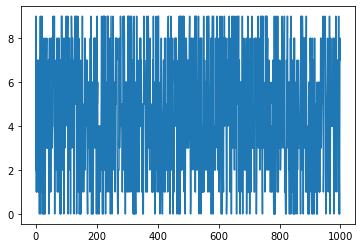

In [2]:
#It looks nothing like a time series
#It is just a sequence of random numbers

from random import seed
from random import randrange
from matplotlib import pyplot

%matplotlib inline 

seed(1)
series=[randrange(10) for i in range(1000)]
pyplot.plot(series)
pyplot.show()

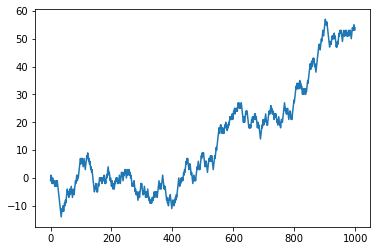

In [3]:
#a random walk series

from random import random
seed(1)
random_walk=list()
random_walk.append(-1 if random() <0.5 else 1)

for i in range(1,1000):
    movement=-1 if random() <0.5 else 1
    value=random_walk[i-1]+movement
    random_walk.append(value)
pyplot.plot(random_walk)
pyplot.show()

value: [-1, 0, 1, 0, -1, -2, -1, 0, -1, -2, -1, -2, -1, -2, -3, -2, -3, -2, -1, -2, -3, -2, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -13, -12, -11, -12, -11, -10, -11, -12, -11, -10, -9, -10, -9, -8, -9, -8, -7, -6, -5, -4, -5, -6, -5, -6, -7, -6, -5, -4, -5, -6, -5, -4, -3, -4, -5, -6, -7, -6, -5, -4, -5, -6, -5, -4, -3, -2, -1, -2, -1, 0, 1, 0, -1, 0, 1, 0, 1, 2, 3, 4, 5, 6, 7, 6]


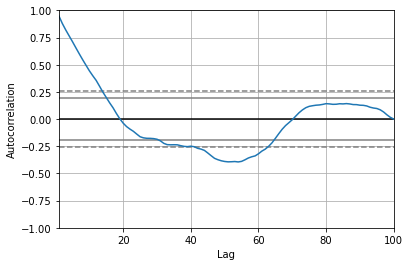

In [7]:
#check autocorrelation of random walk series
##we generally see the expected trend, in this case across the first few hundred lag observations.

from random import random
from pandas.plotting import autocorrelation_plot
seed(1)
random_walk=list()
random_walk.append(-1 if random() <0.5 else 1)

for i in range(1,100):
    movement=-1 if random() <0.5 else 1
    value=random_walk[i-1]+movement
    random_walk.append(value)
print('value:',random_walk)
autocorrelation_plot(random_walk)
pyplot.show()

In [11]:
#ADF
#Statistic value is 0.341605, that is larger than all of critical values at 1%, 5%, 10% confidence levels
#It is a non-stationary series

from random import random
from statsmodels.tsa.stattools import adfuller
seed(1)
random_walk=list()
random_walk.append(-1 if random() <0.5 else 1)

for i in range(1,1000):
    movement=-1 if random() <0.5 else 1
    value=random_walk[i-1]+movement
    random_walk.append(value)

#statisical test
result = adfuller(random_walk)
print("ADF Statistic: %f" % result[0])
print("p-value: %f" % result[1])
print("Critial Values:")
for key, value in result[4].items():
    print("\t%s: %.3f" % (key, value))

ADF Statistic: 0.341605
p-value: 0.979175
Critial Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


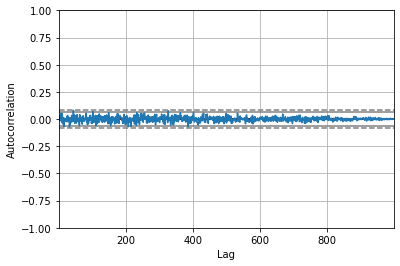

In [14]:
#make series difference

from random import seed
from random import random
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

# create random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
# take difference
diff = list()
for i in range(1, len(random_walk)):
    value = random_walk[i] - random_walk[i - 1]
    diff.append(value)
    
# line plot
autocorrelation_plot(diff)
pyplot.show()

In [15]:
#Statisical value is -31.084824, it is below the 95% and 99% confidence levels

result = adfuller(diff)
print("ADF Statistic: %f" % result[0])
print("p-value: %f" % result[1])
print("Critial Values:")
for key, value in result[4].items():
    print("\t%s: %.3f" % (key, value))

ADF Statistic: -31.084824
p-value: 0.000000
Critial Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
